<a href="https://colab.research.google.com/github/faisstzera/graph_tde/blob/main/AdjacencyList.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

class Grafo:
  def __init__(self):
    self.ordem = 0
    self.lista_adjacencia = {}

  def adiciona_vertice(self, label: str):
    if self.existe_vertice(label) is None:
      self.lista_adjacencia[label] = []
    else:
      print("Vértica já existente!")


  def adiciona_aresta(self,u,v,peso):

    if self.existe_vertice(u) is None:
      self.adiciona_vertice(u)

    if self.existe_vertice(v) is None:
      self.adiciona_vertice(v)

    tupla_aresta = (v, peso)

    self.lista_adjacencia[u].append(tupla_aresta)

  def existe_vertice(self, label):
    return self.lista_adjacencia.get(label)

  def remove_aresta(self,u,v):
    # Primeiramente, buscar a chave do 'u' no dicionário
    # Depois, buscar o índice vértice ao qual ele está ligado dentro da lista de tuplas
    # Finalmente, remover a tupla indicada da lista de acordo com o índice encontrado
    # Complexidade O(n) -> tem como fazer mais rápido aqui ou somente em outra estrutura?

    for i in range(len(self.lista_adjacencia[u])):
      if self.lista_adjacencia[u][i][0] == v:
        self.lista_adjacencia[u].pop(i)
        break

  def remove_vertice(self, u):

    self.lista_adjacencia.pop(u)

  def remove_vertice_completo(self, u):
    # Primeiramente, remove o vértice da lista de adjacência
    # Depois, itera sobre todos os outros vértices na lista de adjacência
    # Cria uma nova lista sem nenhuma aresta que vá em direção à u
    # Extremamente custoso e ineficiente -> O(n²) pois itera sobre o dicionário e sobre as listas.
    # Estou acessando diretamente o índice 0 para buscar a string

      if u in self.lista_adjacencia:
          self.lista_adjacencia.pop(u)

      for key in list(self.lista_adjacencia.keys()):
          self.lista_adjacencia[key] = [edge for edge in self.lista_adjacencia[key] if edge[0] != u]

  def tem_aresta(self,u,v):

    for i in range(len(self.lista_adjacencia[u])):
      if self.lista_adjacencia[u][i][0] == v:
        return True
        break

    return False


  def grau_entrada(self, u):

    count = 0
    key_list = list(self.lista_adjacencia.keys())
    key_list.remove(u)

    for key in key_list:
      for i in range(len(self.lista_adjacencia[key])):
        if self.lista_adjacencia[key][i][0]==u:
          count += 1

    return count

  def grau_saida(self, u):

    return len(self.lista_adjacencia[u])

  def grau(self,u):
    return self.grau_entrada(u) + self.grau_saida(u)

  def get_peso(self,u,v):

    if self.tem_aresta(u,v):

      for i in range(len(self.lista_adjacencia[u])):
        if self.lista_adjacencia[u][i][0] == v:
          return self.lista_adjacencia[u][i][1]


  def desenha_grafo(self):
      G = nx.DiGraph()

      for vertice in self.lista_adjacencia.keys():
          G.add_node(vertice)

      for vertice, arestas in self.lista_adjacencia.items():
          for aresta in arestas:
              G.add_edge(vertice, aresta[0], weight=aresta[1])

      # spring shell dando erro, pedro e roberto sempre estao proximos
      pos = nx.shell_layout(G)
      nx.draw(G, pos, with_labels=True)
      labels = nx.get_edge_attributes(G, 'weight')
      # desenhar peso
      nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
      plt.show()



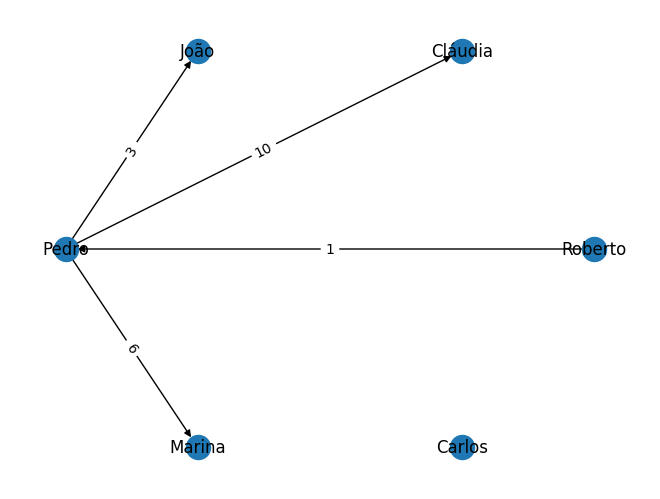

10


In [96]:
G = Grafo()

G.adiciona_vertice("Pedro")
G.adiciona_vertice("Marina")
G.adiciona_vertice("Carlos")
G.adiciona_vertice("Roberto")
G.adiciona_aresta("Pedro", "Marina", 6)
G.adiciona_aresta("Pedro", "Cláudia", 10)
G.adiciona_aresta("Pedro", "João", 3)
G.adiciona_aresta("Roberto", "Pedro", 1)

G.desenha_grafo()
peso = G.get_peso("Pedro", "Cláudia")
print(peso)


In [91]:
print(G.grau_entrada("Pedro"))
print(G.grau_saida("Pedro"))
print(G.grau("Pedro"))

1
3
4


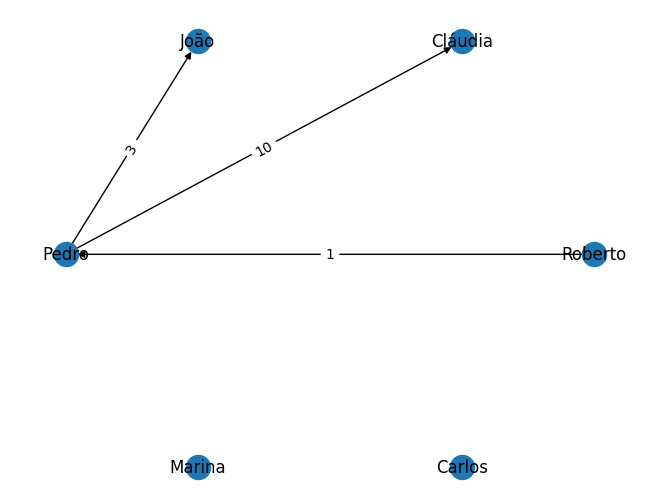

----------------------------------


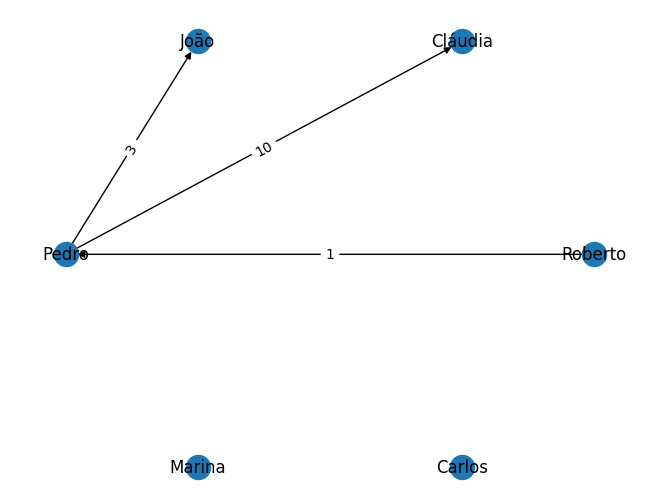

True
True
False


In [98]:
G.desenha_grafo()
G.remove_aresta("Pedro", "Marina")
print("----------------------------------")
G.desenha_grafo()


tem = G.tem_aresta("Pedro", "João")
print(tem)
tem = G.tem_aresta("Pedro", "Cláudia")
print(tem)
tem = G.tem_aresta("Pedro", "Marina")
print(tem)

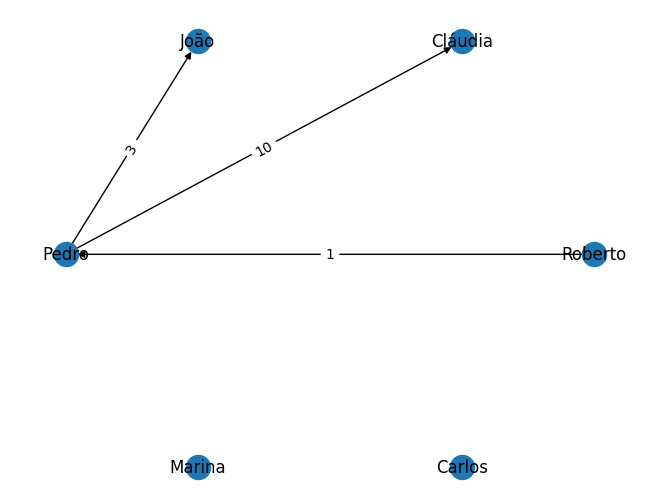

----------------------------------


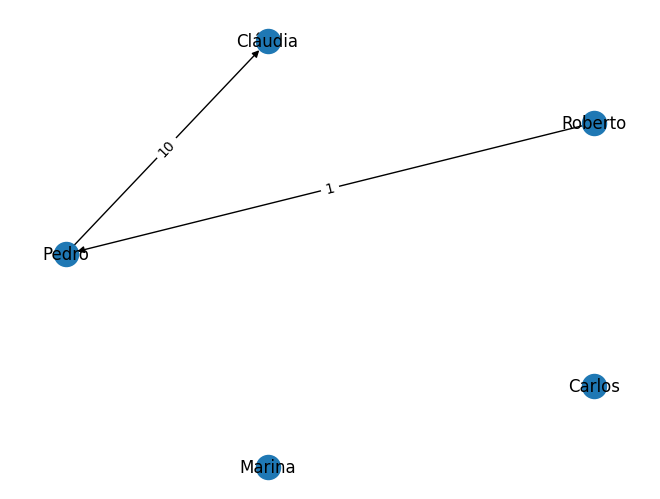

False
2


In [93]:
G.desenha_grafo()
G.remove_vertice_completo("João")
tem = G.tem_aresta("Pedro", "João")
print("----------------------------------")
G.desenha_grafo()
print(tem)
print(G.grau("Pedro"))